In [2]:
import numpy as np
import sys
import glob 
import os 
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy.io as sio

In [22]:
mouseName = "GF193"
nframes = 211

# Hardcoded paths to the server
datapath = '\\\\sv1files.epfl.ch\\Petersen-Lab\\analysis\\Georgios_Foustoukos\\' + mouseName + "\\" 
serverpath = '\\\\sv1files.epfl.ch\\Petersen-Lab\\data\\' + mouseName + '\\Recordings\\Imaging\\'
behavpath = '\\\\sv1files.epfl.ch\\Petersen-Lab\\data\\' + mouseName + '\\Recordings\\BehaviourFiles\\'

# Detect the operating system to fix the slashes

if (os.name == "posix"):
    print("Linux or MacOS system detected")
    datapath= datapath.replace('\\','/')
    datapath = '/Volumes/' + datapath[18:] 
    behavpath = behavpath.replace('\\','/')
    behavpath = '/Volumes' + behavpath[18:] 
    serverpath = serverpath.replace('\\','/')
    serverpath = '/Volumes' + serverpath[18:] 
else:
    print("Windows system detected")

# Find the imaging days
imaging_days = glob.glob(os.path.join(datapath, "GF*"))

for n,f in enumerate(imaging_days):
    imaging_days[n] = os.path.basename(f)
    
AllData = []
    
for i,f in enumerate(imaging_days):
    
    print('Loading day : ' + imaging_days[i])
    
    F_path = datapath + imaging_days[i] + os.sep + 'suite2p' + os.sep + 'plane0' + os.sep + "F.npy"
    Fneu_path = datapath + imaging_days[i] + os.sep + 'suite2p' + os.sep + 'plane0' + os.sep + "Fneu.npy"
    iscell_path = datapath + imaging_days[i] + os.sep + 'suite2p' + os.sep + 'plane0' + os.sep + "iscell.npy"
    spks_path = datapath + imaging_days[i] + os.sep + 'suite2p' + os.sep + 'plane0' + os.sep + "spks.npy"
    
    F = np.load(F_path)
    Fneu = np.load(Fneu_path)
    spks = np.load(spks_path)
    iscell = np.load(iscell_path)
    
    F = F[iscell[:,0]==1.]
    Fneu = Fneu[iscell[:,0]==1.]
    spks = spks[iscell[:,0]==1.]
    
    print('Number of Selected ROIs : ' + str(F.shape[0])
          
          
    behav_path = behavpath + imaging_days[i] + os.sep + 'BehavResults.mat'

    print('Loading behaviour: ' + behav_path)

    beh = sio.loadmat(behav_path)

    vals = beh['BehavResults'][0,0]

    keys = beh['BehavResults'][0,0].dtype.descr

    beh = np.array(vals[keys[0][0]][:][:])
    

    
    frames_path = serverpath + imaging_days[i] + os.sep + 'TrialFrames.mat'
          
    print('Loading frame info: ' +  frames_path)

    frames = sio.loadmat(frames_path)
          
    numOfFrames = frames['NumOfFrames']

    numOfFrames = np.array(numOfFrames)
          
    
    daysDict = dict.fromkeys(['dayName','WM','AM','WH','AH','CR','FA'])

    daysDict['dayName'] = imaging_days[i]
    
    dataDictWM = dict.fromkeys(['WMF','WMFneu','WMspks'])
    dataDictWH = dict.fromkeys(['WHF','WHFneu','WHspks'])
    dataDictAH = dict.fromkeys(['AHF','AHFneu','AHspks'])
    dataDictAM = dict.fromkeys(['AMF','AMFneu','AMspks'])
    dataDictFA = dict.fromkeys(['FAF','FAFneu','FAspks'])
    dataDictFA = dict.fromkeys(['CRF','CRFneu','CRspks'])
    
    WMc = 0;
    AMc = 0;
    WHc = 0;
    AHc = 0;
    CRc = 0;
    FAc = 0;

    WMF = np.zeros(F.shape[0],nframes,sum(performance == 0.0))
    WMFeu = np.zeros(F.shape[0],nframes,sum(performance == 0.0))
    WMspks = np.zeros(F.shape[0],nframes,sum(performance == 0.0))

    AMF = np.zeros(F.shape[0],nframes,sum(performance == 1.0))
    AMFeu = np.zeros(F.shape[0],nframes,sum(performance == 1.0))
    AMspks = np.zeros(F.shape[0],nframes,sum(performance == 1.0))

    WHF = np.zeros(F.shape[0],nframes,sum(performance == 2.0))
    WHFeu = np.zeros(F.shape[0],nframes,sum(performance == 2.0))
    WHspks = np.zeros(F.shape[0],nframes,sum(performance == 2.0))

    AHF = np.zeros(F.shape[0],nframes,sum(performance == 3.0))
    AHFeu = np.zeros(F.shape[0],nframes,sum(performance == 3.0))
    AHspks = np.zeros(F.shape[0],nframes,sum(performance == 3.0))

    CRF = np.zeros(F.shape[0],nframes,sum(performance == 4.0))
    CRFeu = np.zeros(F.shape[0],nframes,sum(performance == 4.0))
    CRspks = np.zeros(F.shape[0],nframes,sum(performance == 4.0))

    FAF = np.zeros(F.shape[0],nframes,sum(performance == 4.0))
    FAFeu = np.zeros(F.shape[0],nframes,sum(performance == 4.0))
    FAspks = np.zeros(F.shape[0],nframes,sum(performance == 4.0))
          
          
    for t in range(len(performance)):
        
        if performance[t] == 0.0:
          
          WMF[:,:,WMc] = F[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
          WMFneu[:,:,WMc] = Fneu[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
          WMspks[:,:,WMc] = spks[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
          WMc += 1 
          
        elif performance[t] == 1.0:
          
            
          AMF[:,:,AMc] = F[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
          AMFneu[:,:,AMc] = Fneu[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
          AMFspks[:,:,AMc] = spks[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
          AMc += 1  
            
        elif performance[t] == 2.0:
            
            
          WHF[:,:,WHc] = F[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
          WHFneu[:,:,WHc] = Fneu[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
          WHFspks[:,:,WHc] = spks[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
          WHc += 1
          
        elif performance[t] == 3.0:
            
            
          AHF[:,:,AHc] = F[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
          AHFneu[:,:,AHc] = Fneu[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
          AHFspks[:,:,AHc] = spks[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
          AHc += 1
           
        elif performance[t] == 4.0:
            
            
          CRF[:,:,CRc] = F[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
          CRFneu[:,:,CRc] = Fneu[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
          CRFspks[:,:,CRc] = spks[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
          CRc += 1
            
        elif performance[t] == 5.0:
            
            
          FAF[:,:,FAc] = F[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
          FAFneu[:,:,FAc] = Fneu[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
          FAFspks[:,:,FAc] = spks[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
          FAc += 1 

          
          
          

    
    
            


          
          
          

    
    

Windows system detected


In [88]:
WMc = 0;
AMc = 0;
WHc = 0;
AHc = 0;
CRc = 0;
FAc = 0;

WMF = np.zeros([F.shape[0],nframes,sum(performance == 0.0)])
WMFneu = np.zeros([F.shape[0],nframes,sum(performance == 0.0)])
WMspks = np.zeros([F.shape[0],nframes,sum(performance == 0.0)])

AMF = np.zeros([F.shape[0],nframes,sum(performance == 1.0)])
AMFneu = np.zeros([F.shape[0],nframes,sum(performance == 1.0)])
AMspks = np.zeros([F.shape[0],nframes,sum(performance == 1.0)])

WHF = np.zeros([F.shape[0],nframes,sum(performance == 2.0)])
WHFneu = np.zeros([F.shape[0],nframes,sum(performance == 2.0)])
WHspks = np.zeros([F.shape[0],nframes,sum(performance == 2.0)])

AHF = np.zeros([F.shape[0],nframes,sum(performance == 3.0)])
AHFneu = np.zeros([F.shape[0],nframes,sum(performance == 3.0)])
AHspks = np.zeros([F.shape[0],nframes,sum(performance == 3.0)])

CRF = np.zeros([F.shape[0],nframes,sum(performance == 4.0)])
CRFneu = np.zeros([F.shape[0],nframes,sum(performance == 4.0)])
CRspks = np.zeros([F.shape[0],nframes,sum(performance == 4.0)])

FAF = np.zeros([F.shape[0],nframes,sum(performance == 5.0)])
FAFneu = np.zeros([F.shape[0],nframes,sum(performance == 5.0)])
FAspks = np.zeros(F.shape[0],nframes,sum(performance == 5.0))

TypeError: data type not understood

In [86]:
WMc = 0;
AMc = 0;
WHc = 0;
AHc = 0;
CRc = 0;
FAc = 0;

WMF = np.zeros(F.shape[0],nframes,sum(performance == 0.0))
WMFneu = np.zeros(F.shape[0],nframes,sum(performance == 0.0))
WMspks = np.zeros(F.shape[0],nframes,sum(performance == 0.0))

AMF = np.zeros(F.shape[0],nframes,sum(performance == 1.0))
AMFneu = np.zeros(F.shape[0],nframes,sum(performance == 1.0))
AMspks = np.zeros(F.shape[0],nframes,sum(performance == 1.0))

WHF = np.zeros(F.shape[0],nframes,sum(performance == 2.0))
WHFneu = np.zeros(F.shape[0],nframes,sum(performance == 2.0))
WHspks = np.zeros(F.shape[0],nframes,sum(performance == 2.0))

AHF = np.zeros(F.shape[0],nframes,sum(performance == 3.0))
AHFneu = np.zeros(F.shape[0],nframes,sum(performance == 3.0))
AHspks = np.zeros(F.shape[0],nframes,sum(performance == 3.0))

CRF = np.zeros(F.shape[0],nframes,sum(performance == 4.0))
CRFneu = np.zeros(F.shape[0],nframes,sum(performance == 4.0))
CRspks = np.zeros(F.shape[0],nframes,sum(performance == 4.0))

FAF = np.zeros(F.shape[0],nframes,sum(performance == 5.0))
FAFneu = np.zeros(F.shape[0],nframes,sum(performance == 5.0))
FAspks = np.zeros(F.shape[0],nframes,sum(performance == 5.0))

if performance[t] == 0.0:
        WMF[:,:,WMc] = F[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
        WMFneu[:,:,WMc] = Fneu[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
        WMspks[:,:,WMc] = spks[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
        WMc += 1 
          
elif performance[t] == 1.0:
        AMF[:,:,AMc] = F[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
        AMFneu[:,:,AMc] = Fneu[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
        AMFspks[:,:,AMc] = spks[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
        AMc += 1  

elif performance[t] == 2.0:
        WHF[:,:,WHc] = F[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
        WHFneu[:,:,WHc] = Fneu[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
        WHFspks[:,:,WHc] = spks[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
        WHc += 1
          
elif performance[t] == 3.0:
        AHF[:,:,AHc] = F[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
        AHFneu[:,:,AHc] = Fneu[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
        AHFspks[:,:,AHc] = spks[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
        AHc += 1
        
elif performance[t] == 4.0:
        CRF[:,:,CRc] = F[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
        CRFneu[:,:,CRc] = Fneu[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
        CRFspks[:,:,CRc] = spks[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
        CRc += 1
            
elif performance[t] == 5.0:
        FAF[:,:,FAc] = F[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
        FAFneu[:,:,FAc] = Fneu[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
        FAFspks[:,:,FAc] = spks[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
        FAc += 1 

    

IndentationError: unexpected indent (<ipython-input-86-79b26560c638>, line 2)

In [65]:
performance[1] == 0.0

False

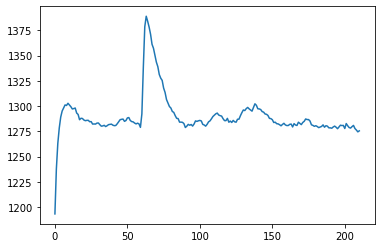

In [85]:
plt.plot(np.mean(WMF,axis = (0,2)))

